In [ ]:
!pip install diffusers transformers torch

In [ ]:
import os

os.environ["WANDB_DISABLED"] = "true"

In [ ]:
import os
import warnings
import logging
import torch
from diffusers import StableDiffusionPipeline

# Suppress future warnings and set logging level to error
warnings.filterwarnings("ignore", category=FutureWarning)
logging.getLogger("diffusers").setLevel(logging.ERROR)


In [ ]:
def generate_image(prompt: str, output_path: str = "outputs/generated_image.png", guidance_scale: float = 7.5):
    """
    Generates an image from a text prompt using Stable Diffusion.
    The generated image is saved to the given output_path.
    """
    model_id = "runwayml/stable-diffusion-v1-5"
    device = "cuda" if torch.cuda.is_available() else "cpu"

    # Load the pipeline with half precision if CUDA is available for speed and efficiency.
    pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
    pipe = pipe.to(device)

    # Generate the image using the provided prompt.
    image = pipe(prompt, guidance_scale=guidance_scale).images[0]
    image.save(output_path)
    print(f"\nImage saved as: {output_path}")


In [ ]:
import cv2
from matplotlib import pyplot as plt

def show_img(dir):
    fig = plt.figure(figsize=(10, 7))
    image1 = cv2.imread(dir)
    image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

    plt.subplot(2, 2, 1)  # 2 rows, 2 columns, first position
    plt.imshow(image1)
    plt.axis('off')
    plt.title("Original Image")

    plt.show()


In [ ]:
def main():
    # Ensure output directory exists
    os.makedirs("outputs", exist_ok=True)
    print("Welcome to your first Stable Diffusion demo!")
    print("This tool lets you experiment with text-to-image prompts.\n")

    while True:
        prompt = input("Enter a text prompt (or type 'exit' to quit): ").strip()
        if prompt.lower() == "exit":
            print("Exiting the demo. Happy creating!")
            break

        # Optionally, allow user to change the guidance scale if desired.
        try:
            scale_input = input("Enter guidance scale [default 7.5] (higher values mean the image follows the prompt more strictly): ").strip()
            guidance_scale = float(scale_input) if scale_input else 7.5
        except ValueError:
            print("Invalid input for guidance scale. Using default 7.5.")
            guidance_scale = 7.5

        output_filename = prompt.replace(" ", "_")[:30]  # simple filename based on prompt (max 30 characters)
        output_path = os.path.join("outputs", f"{output_filename}.png")

        generate_image(prompt, output_path, guidance_scale)

        show_img(output_path)

        # Ask if the user wants to try another prompt
        cont = input("\nDo you want to try another prompt? (y/n): ").strip().lower()
        if cont != "y":
            print("Thank you for trying out Stable Diffusion. Goodbye!")
            break


Welcome to your first Stable Diffusion demo!
This tool lets you experiment with text-to-image prompts.

Enter a text prompt (or type 'exit' to quit): flying elephant
Enter guidance scale [default 7.5] (higher values mean the image follows the prompt more strictly): 10


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]


Image saved as: outputs/flying_elephant.png


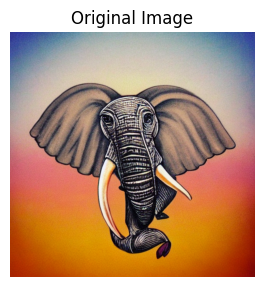


Do you want to try another prompt? (y/n): n
Thank you for trying out Stable Diffusion. Goodbye!


In [ ]:
if __name__ == "__main__":
    main()